In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [2]:
print (os.listdir())

['.ipynb_checkpoints', 'Augmentations Code', 'Classifier Notebook.ipynb', 'Experimentations.ipynb', 'newmodeltry', 'Pretrained model notebooks', 'Test', 'tf_lite_model.tflite', 'Train']


In [3]:
data = []
labels = []
classes = 2
cur_path = os.path.join('D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2','Train',str())

In [4]:
cur_path

'D:\\DATA SCIENCE\\DataSets\\Research\\Coral Technologies\\Meter image classification 2\\Train\\'

In [5]:
for i in range(classes):
    path = os.path.join('D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2','Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '/'+ a).convert('RGB')
            image = image.resize((100,100))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [6]:
#data = np.array(data)
labels = np.array(labels)

In [7]:
data

[array([[[ 25,  33,  12],
         [ 27,  34,  13],
         [ 26,  35,  14],
         ...,
         [193, 216, 229],
         [203, 224, 239],
         [222, 237, 251]],
 
        [[ 32,  40,  21],
         [ 37,  44,  30],
         [ 41,  50,  36],
         ...,
         [180, 202, 222],
         [194, 215, 233],
         [215, 231, 246]],
 
        [[ 64,  77,  75],
         [ 73,  86,  87],
         [ 75,  89,  90],
         ...,
         [209, 225, 238],
         [224, 239, 245],
         [238, 247, 251]],
 
        ...,
 
        [[ 45,   9,   2],
         [ 44,   8,   1],
         [ 40,   5,   0],
         ...,
         [ 75,  46,  32],
         [ 80,  49,  39],
         [ 80,  49,  39]],
 
        [[ 43,   6,   2],
         [ 42,   5,   1],
         [ 44,   7,   2],
         ...,
         [ 74,  45,  31],
         [ 72,  42,  31],
         [ 71,  42,  30]],
 
        [[ 39,   4,   2],
         [ 37,   2,   1],
         [ 38,   1,   1],
         ...,
         [ 74,  43,  28],
  

In [8]:
labels

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
#os.mkdir('newmodeltry')

np.save('./newmodeltry/data',data)
np.save('./newmodeltry/target',labels)

In [10]:
data=np.load('./newmodeltry/data.npy')
labels=np.load('./newmodeltry/target.npy')

In [11]:
print(data.shape, labels.shape)

(2649, 100, 100, 3) (2649,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2119, 100, 100, 3) (530, 100, 100, 3) (2119,) (530,)


## Convert labels to onehot encoding

In [14]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(1, 1), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(2, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
epochs = 1
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

67/67 [==============================] - 137s 2s/step - loss: 0.1056 - accuracy: 0.9589 - val_loss: 0.1246 - val_accuracy: 0.9528


In [ ]:
# accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [ ]:
# Loss
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## LEt's do testing on Test data

## Save the model

In [69]:
model.save("./newmodeltry/Knight.h5")

## Load the Model

In [70]:
import os
os.chdir(r'D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2')
from keras.models import load_model
model = load_model('./newmodeltry/Knight.h5')

### Test - 2 (Folder Images Test)

In [71]:
classes = { 0:'real',
            1:'spoof'}

In [72]:
folder_path=(r'D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2\Test\0')

In [73]:
# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    image = Image.open(img).convert('RGB')
    image = image.resize((100,100))
    image = np.expand_dims(image, axis=0)
    images.append(np.array(image))

In [74]:
# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [75]:
folder_path=(r'D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2\Test\1')

In [76]:
# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    image = Image.open(img).convert('RGB')
    image = image.resize((100,100))
    image = np.expand_dims(image, axis=0)
    images.append(np.array(image))

In [77]:
# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


### Probability Score Test

In [78]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array

In [79]:
img = cv2.imread(r'D:\DATA SCIENCE\DataSets\Research\Coral Technologies\Meter image classification 2\Test\1\_0_82.png') # BGR

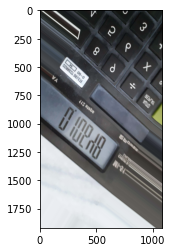

In [80]:
plt.imshow(img)

In [81]:
img = cv2.resize(img,(100,100))
img= img.astype('float')/ 255.0
img = img_to_array(img)
img=np.expand_dims(img,axis=0)
img.shape

(1, 100, 100, 3)

In [82]:
results = model.predict_proba(img)

In [83]:
results[0]

array([0.3404796, 0.6595203], dtype=float32)

<AxesSubplot:>

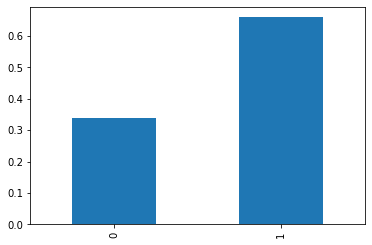

In [84]:
pd.Series(results.flatten()).plot(kind='bar')              

### Note 0 means real and 1 means spoof.

In [ ]:
# 66\80 -- val loss not recorded but img size - 30,30 
# 66\80 -- 0.29 for img size - 50,50 
# 74\80 -- 0.23 for img size - 100,100
# 73\80 -- 0.24 for img size - 100,100 again
# 75\80 -- 0.22 for img size - 100,100, (model 2)
# 75\80 -- (val_loss -- 0.17, val_acc -- 0.93) for img size - 100,100
# 79\80 -- (val_loss -- 0.15, val_acc -- 0.94), model - "0.15vallossmodel.h5", imgsize-100*100 
# 79\80 -- (val_loss -- 0.12, val_acc -- 0.95), model - "Knight.h5", imgsize-100*100 --------------->  BEST MODEL SO FAR........